# Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

# Importing and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
df_train= pd.read_csv(r'C:\Users\mssre\Desktop\Data\loan\train_ctrUa4K.csv')
df_test= pd.read_csv(r'C:\Users\mssre\Desktop\Data\loan\test_lAUu6dG.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df_train['loan']= (df_train['Loan_Status']=='Y').astype('int')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  loan               614 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(8)
memory usage: 64.9+ KB


In [4]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loan                  0
dtype: int64

In [5]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(),inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0],inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)

In [6]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
df_test.dropna(inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


In [9]:
df_train['Dependents'].replace('3+','3',inplace=True)
df_train['Dependents']=df_train['Dependents'].astype('int')
df_test['Dependents'].replace('3+','3',inplace=True)
df_test['Dependents']=df_test['Dependents'].astype('int')

# Basic EDA and Variable Correlations

<AxesSubplot:>

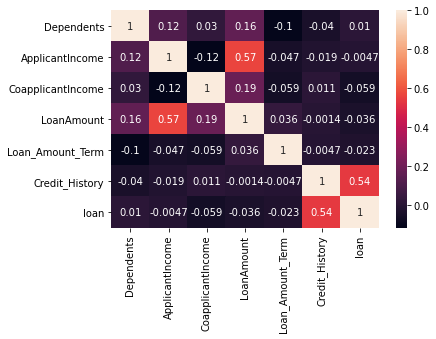

In [10]:
import seaborn as sns
cor= df_train.corr()
sns.heatmap(cor,annot=True)

Here there's good correlation between Loan amount and Applicant Income.

Good correlation between credit history and loan status. Hence credit history is important predictor variable for deciding loan status. 

# Label Encoding and Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
df_train['Gender']= enc.fit_transform(df_train['Gender'])
df_train['Married']= enc.fit_transform(df_train['Married'])
df_train['Education']= enc.fit_transform(df_train['Education'])
df_train['Self_Employed']= enc.fit_transform(df_train['Self_Employed'])
df_train['Property_Area']= enc.fit_transform(df_train['Property_Area'])

In [12]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y,1


In [13]:
df_test['Gender']= enc.fit_transform(df_test['Gender'])
df_test['Married']= enc.fit_transform(df_test['Married'])
df_test['Education']= enc.fit_transform(df_test['Education'])
df_test['Self_Employed']= enc.fit_transform(df_test['Self_Employed'])
df_test['Property_Area']= enc.fit_transform(df_test['Property_Area'])

# Building a ML Model for Loan approval Prediction

In [14]:
x_train= df_train.drop(['Loan_ID','Loan_Status','loan'],axis=1)
y_train= df_train['loan']
x_test= df_test.drop(['Loan_ID'],axis=1)

In [15]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

In [16]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred1= knn.predict(x_test)

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train,y_train)
y_pred2= log.predict(x_test)

C:\Users\mssre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Final Results of Loan Status

We will be using predictions of Random forest, because they are set of decission trees and well suited for small data sets.
Usually tree-based algorithms are very useful when you have a small amount of data. They prevent overfitting and can also work well with missing values and outliers.

In [21]:
df_final= pd.DataFrame({'Loan_ID':df_test['Loan_ID'],'status':y_pred})
df_final['Loan_Status']= np.where((df_final['status'] == 1) ,'Y','N')

In [22]:
df_final.drop('status',axis=1,inplace=True)

In [23]:
df_final

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
4,LP001051,Y
5,LP001054,N
...,...,...
361,LP002969,Y
362,LP002971,Y
363,LP002975,Y
365,LP002986,Y


In [232]:
df_final.to_csv(r'C:\Users\mssre\Desktop\final_1.csv',index=False)
df_final.to_csv('final_1.csv', encoding='utf-8')